In [1914]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [1915]:
df1 = pd.read_csv("dataset1.csv")
df2 = pd.read_csv("dataset2.csv")

In [1916]:
df1

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,4/05/2018 4:18,2.000000,rat,4/05/2018 4:14,4/05/2018 4:30,224,1,0,5,3/05/2018 19:22,8.933333,1
903,4/05/2018 4:18,1.000000,fast,4/05/2018 4:14,4/05/2018 4:30,275,0,1,5,3/05/2018 19:22,8.947500,1
904,4/05/2018 4:19,22.000000,pick,4/05/2018 4:14,4/05/2018 4:30,310,0,1,5,3/05/2018 19:22,8.957222,1
905,3/05/2018 23:51,2.000000,fast,3/05/2018 23:46,3/05/2018 23:52,339,0,1,5,3/05/2018 19:22,4.498889,1


In [1917]:
df2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0
...,...,...,...,...,...,...,...
2118,1/06/2018 3:41,6,8.0,20,1.000000,0.0,0
2119,1/06/2018 4:11,6,8.5,7,1.000000,0.0,0
2120,1/06/2018 4:41,6,9.0,6,1.000000,0.0,0
2121,1/06/2018 5:11,6,9.5,7,1.000000,0.0,0


In [1964]:
#Inferential analysis

In [1975]:
rats_present_times = df1[df1['rats_present'] == 'Yes']['bat_landing_to_food']
no_rats_times = df1[df1['rats_present'] == 'No']['bat_landing_to_food']
t_stat, p_value= stats.ttest_ind(rats_present_times, no_rats_times, equal_var=False, nan_policy='omit')
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

t-statistic: -0.2767
p-value: 0.8078


In [1974]:
contingency_table = pd.crosstab(df1['rats_present'], df1['reward'])
chi2, p_value_chi_reward, _, _ = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value_chi_reward:.4f}")

Chi-square statistic: 0.0000
p-value: 1.0000


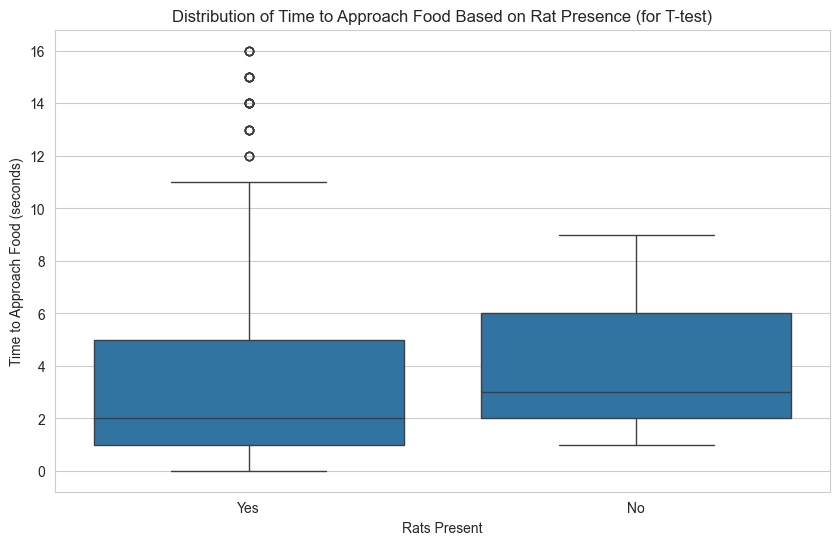

Reasoning: The box plot visually represents the averages and spread of the data that the t-test analyzed. It helps us see the magnitude of the difference and the overlap between the two groups.


In [1967]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rats_present', y='bat_landing_to_food', data=df1)
plt.title('Distribution of Time to Approach Food Based on Rat Presence (for T-test)')
plt.xlabel('Rats Present')
plt.ylabel('Time to Approach Food (seconds)')
plt.show()
print("Reasoning: The box plot visually represents the averages and spread of the data that the t-test analyzed. It helps us see the magnitude of the difference and the overlap between the two groups.")


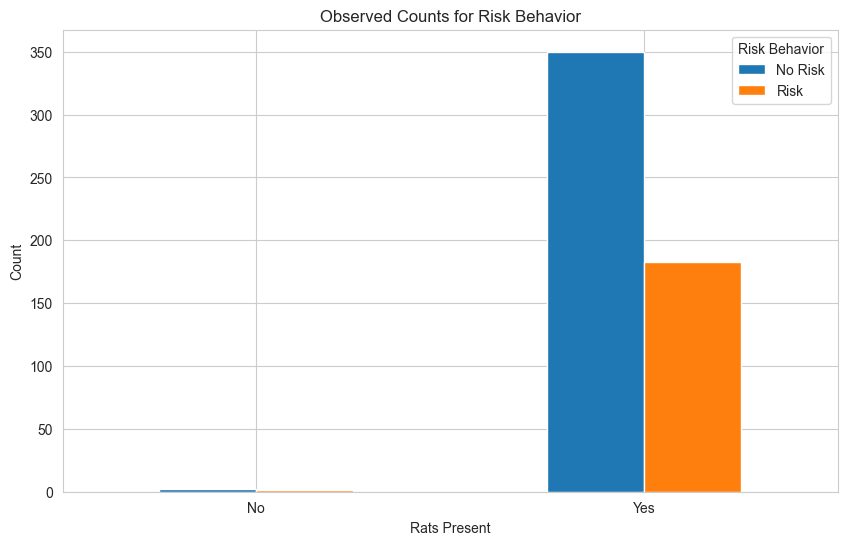


Reasoning: This bar plot shows the actual counts used in the chi-square test for risk behavior. It makes it easy to see if there are noticeable differences in the number of risky vs. non-risky landings when rats are present.


In [1968]:
contingency_table_risk = pd.crosstab(df1['rats_present'], df1['risk'])
contingency_table_risk.plot(kind='bar', figsize=(10, 6))
plt.title('Observed Counts for Risk Behavior')
plt.xlabel('Rats Present')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Risk Behavior', labels=['No Risk', 'Risk'])
plt.show()
print("\nReasoning: This bar plot shows the actual counts used in the chi-square test for risk behavior. It makes it easy to see if there are noticeable differences in the number of risky vs. non-risky landings when rats are present.")


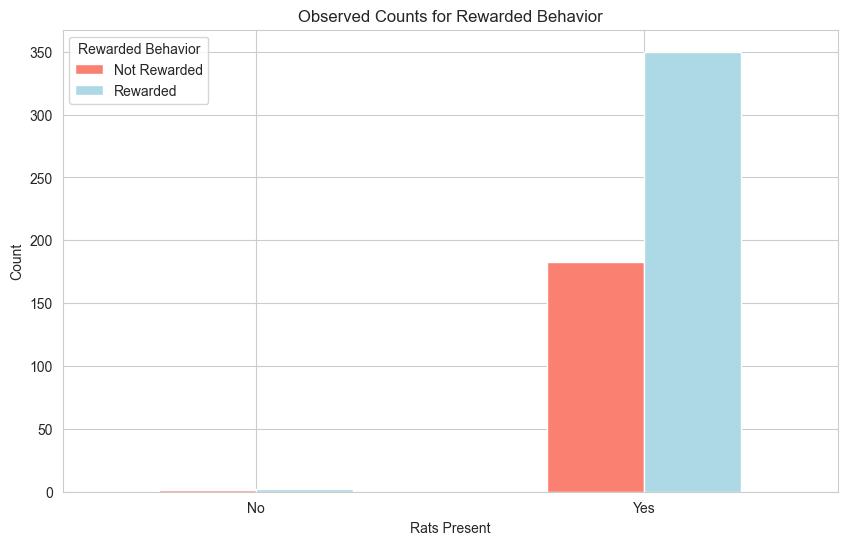

In [1969]:
contingency_table_reward = pd.crosstab(df1['rats_present'], df1['reward'])
contingency_table_reward.plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue'])
plt.title('Observed Counts for Rewarded Behavior')
plt.xlabel('Rats Present')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Rewarded Behavior', labels=['Not Rewarded', 'Rewarded'])
plt.show()

In [1970]:
alpha = 0.05


In [1977]:
if p_value < alpha:
    print("\nResult: The p-value is less than the significance level.")
    print("Conclusion: There is a statistically significant difference in the mean time to food between the two groups.")
    print("This suggests that bats' perception of risk (avoidance vs. taking) affects how quickly they approach food.")
else:
    print("\nResult: The p-value is greater than the significance level.")
    print("Conclusion: There is no statistically significant difference in the mean time to food between the two groups.")
    print("This suggests that bats' perception of risk does not significantly affect how quickly they approach food.")



Result: The p-value is greater than the significance level.
Conclusion: There is no statistically significant difference in the mean time to food between the two groups.
This suggests that bats' perception of risk does not significantly affect how quickly they approach food.
